# Proyecto Ruido UNAL- Proyecto 2

**Presentador por:**
---

---
- **Juan Daniel Gomez Ríos.**
- Estudiante de Ciencias de la Computación de la Universidad Nacional de Colombia.
- Email: judgomezri@unal.edu.co
- Google Site: 

---

- **Juan Esteban Cepeda Baena.**
- Estudiante de Ciencias de la Computación y Administración de Empresas de la Universidad Nacional de Colombia.
- Email: jecepedab@unal.edu.co / juancepeda.gestion@gmail.com
- Google Site: https://sites.google.com/view/juancepeda/

---

- **Carlos Ernesto Isaza Carvajal.**
- Estudiante de Matemáticas de la Universidad Nacional de Colombia.
- Email: ceisazac@unal.edu.co
- Google Site:

---

- **Tania Valentina Delgado Castillo.**
- Estudiante de Ciencias de la Computación de la Universidad Nacional de Colombia.
- Email: tvcastillod@unal.edu.co
- Google Site:

**1. Introducción.**

---
Lorem ipsum dolor sit amet, consectetur adipiscing elit. Donec nisi justo, lobortis a libero vel, tristique rhoncus nulla. Aenean non arcu vel elit ultricies interdum vel ut eros. Aliquam erat volutpat. In molestie turpis vel neque ornare, vitae porttitor orci elementum. Etiam pulvinar enim lobortis nibh sagittis egestas. Cras eu condimentum lorem. Fusce auctor, orci dapibus ullamcorper pharetra, turpis ipsum tincidunt tellus, nec finibus arcu massa vitae ante. Aliquam non bibendum justo.

**2. Estado del Arte.**

---
Lorem ipsum dolor sit amet, consectetur adipiscing elit. Donec nisi justo, lobortis a libero vel, tristique rhoncus nulla. Aenean non arcu vel elit ultricies interdum vel ut eros. Aliquam erat volutpat. In molestie turpis vel neque ornare, vitae porttitor orci elementum. Etiam pulvinar enim lobortis nibh sagittis egestas. Cras eu condimentum lorem. Fusce auctor, orci dapibus ullamcorper pharetra, turpis ipsum tincidunt tellus, nec finibus arcu massa vitae ante. Aliquam non bibendum justo.

**3. Materiales y Métodos.**

---
Lorem ipsum dolor sit amet, consectetur adipiscing elit. Donec nisi justo, lobortis a libero vel, tristique rhoncus nulla. Aenean non arcu vel elit ultricies interdum vel ut eros. Aliquam erat volutpat. In molestie turpis vel neque ornare, vitae porttitor orci elementum. Etiam pulvinar enim lobortis nibh sagittis egestas. Cras eu condimentum lorem. Fusce auctor, orci dapibus ullamcorper pharetra, turpis ipsum tincidunt tellus, nec finibus arcu massa vitae ante. Aliquam non bibendum justo.


**3.1 Modelo numérico**: 

**3.2 Herramientas computacionales:**

Las herramientas computacionales o librerías utilizadas para el desarrollo del proyecto fueron: 1) Numpy, 2) google.colab, 3) Matplotlib, 4) Math, 5) Pandas, 6) Warnings, 7) Folium, 8) Socket, 9)stmplib, 10)ssl, 11)email y 12)geopy. A continuación se explica qué son y cómo fueron utilizadas:



**4. Resultados.**

---

A continuación, se presenta el código del programa, los resultados del algorítmo de entrenamiento y el algortímo de prueba.

In [2]:
# Install folium & scipy
#!pip install folium
#!pip install scipy

In [3]:
# Import libraries.
import pandas as pd
import numpy as np
import scipy
import scipy.io.wavfile
import matplotlib.pyplot as plt
import math
import os
import datetime

import folium
from folium import plugins
from folium.plugins import HeatMap

In [4]:
# Graphing helper function
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

# Noise Levels Messages.
def noise_levels(db):
    if(db <= 10): return "Casi tranquilo, respirando"
    elif(db > 10 and db <= 20): return "Hojas que aherrumbran, reloj que hace tictac"
    elif(db > 20 and db <= 30): return "Susurro, zona rural tranquila"
    elif(db > 30 and db <= 40): return "Biblioteca silenciosa, llamadas de aves"
    elif(db > 40 and db <= 50): return "Oficina tranquila, lluvias moderadas"
    elif(db > 50 and db <= 60): return "Conversación normal"
    elif(db > 60 and db <= 70): return "Tráfico Ocupado, aspirador"
    elif(db > 70 and db <= 80): return "Música de la carga, despertadores"
    elif(db > 80 and db <= 90): return "Carro diesel, cortacéspedes"
    elif(db > 90 and db <= 100): return "Motocicleta, secador de soplo"
    elif(db > 100 and db <= 110): return "Conciertos, niño gritando"
    elif(db > 110 and db <= 120): return "Umbral de dolor, trueno"

# Get audio-gps author.
def author(id):
    if id == 1: return "Daniel"
    elif id == 2: return "Juan Esteban"
    elif id == 3: return "Carlos"
    elif id == 4: return "Tania"

# Mean function.
def getMean(lista):
    suma = 0
    for i in lista: 
        suma += i
    return suma/len(lista)

# Convert string to datetime.
def convertToDatetime(date):
    date = date.replace("T", " ").replace("Z", " ")[:19]
    date = datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S')
    return date

In [5]:
# Mount drive in order to read files from it (only for Google Drive)
#from google.colab import drive
#drive.mount("/content/drive")

In [6]:
# Load audio & GPS files.
pathFile =  "./Almacenamiento de Audios y GPS/"
csv_files = list()
sound_files = list()

# Get CSV files.
with os.scandir(pathFile) as entries:
    for entry in entries:
        if(entry.name.find("csv") > 0):
            csv_files.append(entry.name)
            sound_files.append(entry.name[0:3])

FileNotFoundError: [WinError 3] El sistema no puede encontrar la ruta especificada: './Almacenamiento de Audios y GPS/'

In [7]:
csv_files

[]

In [0]:
# Convert amplitude to decibels.
def toDB(input_signal, compensation = 0):
    # Compute dB of audio.
    # https://stackoverflow.com/questions/2445756/how-can-i-calculate-audio-db-level
    INCREASE = 40

    if(max(input_signal) > abs(min(input_signal))): 
        max_amplitude = max(input_signal)
    else: 
        max_amplitude = abs(min(input_signal))
    input_signal_normalize = abs(input_signal / max_amplitude)

    db = list()
    for i in input_signal_normalize:
        if i != 0: 
            db.append(abs(20 * math.log(abs(i), 10)) + INCREASE + compensation)
        else:
            db.append(0)
    return db

def addSecondsColumn(df):

    df2 = pd.DataFrame()
    for i in range(0, len(df) - 1):
        d1 = convertToDatetime(df["time"].iloc[i])
        d2 = convertToDatetime(df["time"].iloc[i+1])
        diff = abs((d2-d1).seconds)
        data = df.iloc[i]
      
        if diff <= 30:
          new_row = [d1 - datetime.timedelta(hours = 5), data["lat"], data["lon"], diff]
          df2 = df2.append([new_row], ignore_index=True)

    df2.columns=["time", "lat", "lon", "seconds"]
    return df2

def getNoiseDataframe(df, time_array, input_signal, compensation):

    # Initialize noise dataframe.
    noise = pd.DataFrame()

    # Seconds counter.
    seconds = 0
    frame_duration = 0

    # Process noise levels associate with time.
    for i in range(0, len(df)): #len(df)

        try:
            print("Processing...")

            # Get frame duration.
            frame_duration += df.iloc[i][3]

            # Find index.
            for t in list(time_array):
              if abs(frame_duration - t) < 0.00001:
                  array_pos = list(time_array).index(frame_duration)
                  break

            # Get audio partition.
            audio_partition = input_signal[seconds : array_pos]

            # Compute dB of audio partition.
            db = toDB(audio_partition, compensation = compensation)
            mean_db = getMean(db)

            # Append analysis 
            print("Mean DB: ", mean_db)
            noise = noise.append([[mean_db/100, noise_levels(mean_db)]], ignore_index = True)

            # Increase seconds.
            seconds += frame_duration

        except: 
            print("Error!")
            break

    noise.columns=["Noise", "Description"]
    return noise

In [8]:
for i in range(4,5): #len(csv_files)

    print("Autor: ", author(int(csv_files[i][0])))
    print(csv_files[i])
    print(sound_files[i])
    
    # Set gps and sound path file.
    gpsPath = pathFile + csv_files[i] 
    soundPath = pathFile + sound_files[i] + ".wav"

    # Get date, hour & compensation.
    date = csv_files[i][4:8]
    hour = csv_files[i][9:13]
    compensation = int(csv_files[i][14])
    print("Date: ", date, ", Hour: ", hour, ", Compensation: ", compensation)

    # Read gps file and add seconds column.
    
    try:
      df = pd.read_csv(gpsPath, delimiter=";", error_bad_lines=False)
      df = addSecondsColumn(df)
    except:
      df = pd.read_csv(gpsPath, delimiter=",", error_bad_lines=False)
      df = addSecondsColumn(df)
    #df = df.iloc[0:5]
    print(df.head(10))

    # Load audio file.
    (sample_rate, input_signal) = scipy.io.wavfile.read(pathFile + sound_files[5] + ".wav")
    time_array = np.arange(0, len(input_signal)/sample_rate, 1/sample_rate)   
    audio_duration_minutes = time_array[-1] / 60
    print("Sound ready! Duration in minutes: ", audio_duration_minutes)

    # Get noise dataframe.
    noise = getNoiseDataframe(df, time_array, input_signal, compensation)
    print(noise)

    # Append noise dataframe to dataframe.
    df = df.join(noise)
    print(df)

Autor:  Daniel
1-2-0910-0947-0.csv
1-2
Date:  0910 , Hour:  0947 , Compensation:  0
                 time         lat           lon  seconds
0 2019-10-09 09:46:53  4,63461145  -74,08051489        4
1 2019-10-09 09:46:57  4,63466901  -74,08054614        4
2 2019-10-09 09:47:01  4,63465182  -74,08051943        4
3 2019-10-09 09:47:05  4,63458137  -74,08051934        4
4 2019-10-09 09:47:09  4,63470972  -74,08050805        4
5 2019-10-09 09:47:13  4,63468026  -74,08048798        4
6 2019-10-09 09:47:17  4,63458626  -74,08051535        3
7 2019-10-09 09:47:20  4,63462926  -74,08040057        6
8 2019-10-09 09:47:26  4,63469813  -74,08034267        4
9 2019-10-09 09:47:30  4,63474068  -74,08038092        3


ValueError: ignored

In [0]:
df.head(10)

,time,lat,lon,seconds
0,2019-10-09 16:12:46,"4,63763125","-74,08134413",4
1,2019-10-09 16:12:50,"4,63749096","-74,08119514",7
2,2019-10-09 16:12:57,"4,63739131","-74,08118894",6
3,2019-10-09 16:13:02,"4,6375499","-74,0810766",7
4,2019-10-09 16:13:09,"4,63750763","-74,08123927",7
5,2019-10-09 16:13:02,"4,6374615","-74,0810585",21
6,2019-10-09 16:13:23,"4,63725853","-74,08109697",5
7,2019-10-09 16:13:19,"4,6373274","-74,0809115",15
8,2019-10-09 16:13:34,"4,63720933","-74,08122604",4
9,2019-10-09 16:13:27,"4,6371442","-74,0808959",17


## Draw gps road.

In [0]:
# Initialize map.
lat = df.iloc[0]["lat"]
lon = df.iloc[0]["lon"]
map_hooray = folium.Map(location=[4.6365, -74.0815], zoom_start = 17) #, width = 800, height = 480)

# Get Data.
latitude = list()
longitude = list()
weight = list()

for i in range(0, len(df)):
    latitude.append(float(str(df.iloc[i]["lat"]).replace(",",".")))
    longitude.append(float(str(df.iloc[i]["lon"]).replace(",",".")))
    #weight.append(float(str(df.iloc[i]["Noise"]).replace(",",".")))

data = pd.DataFrame(data={"Latitude": latitude, "Longitude": longitude }) #"Weight":weight})
#print(data)

# List comprehension to make out list of lists
heat_data = [[row['Latitude'],row['Longitude']] for index, row in data.iterrows()] # , row["Weight"]] 

# Plot it on the map
#HeatMap(heat_data).add_to(map_hooray)

#add markers
folium.Marker(heat_data[0], popup='<i>Inicio Trayecto</i>',).add_to(map_hooray)
folium.Marker(heat_data[-1], popup='<i>Fin Trayecto</i>',).add_to(map_hooray)

folium.PolyLine(heat_data, maxval = 1.25, color="red", weight=2.5, opacity=1).add_to(map_hooray)

# Display the map
map_hooray

#HeatMap(data).add_to(map_hooray)
#map_hooray


## Procesamiento de un Audio

In [0]:
print(csv_files)
print(sound_files)

['4-1-1110-0939-0.csv', '4-2-1110-1139-0.csv', 'M-1-1016-0940-0.csv', '1-1-0910-0920-0.csv', '1-3-0910-1613-0.csv', '1-2-0910-0947-0.csv']
['4-1', '4-2', 'M-1', '1-1', '1-3', '1-2']


176400
[  0   0   0 ... 128 134 135]
Convertion to DB ready!


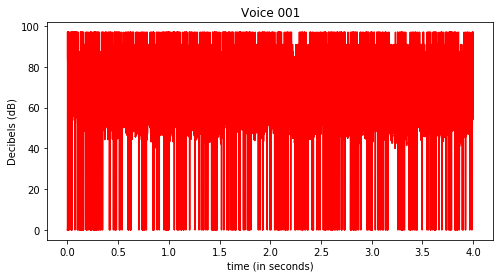

57.36915022584115
      Noise
0  57.36915


In [0]:
noise = pd.DataFrame()
seconds = 0
frame_duration = df2.iloc[0][3]

for t in list(time_array):
    if abs(frame_duration - t) < 0.00001:
       array_pos = list(time_array).index(frame_duration)
       break

print(array_pos)
print(input_signal[seconds:array_pos])

audio_partition = input_signal[seconds:array_pos]

# Compute dB of audio.
db = toDB(audio_partition)
print("Convertion to DB ready!")
    
setup_graph(title='Voice 001', x_label='time (in seconds)', y_label='Decibels (dB)', fig_size=(8,4))
_ = plt.plot(time_array[seconds : array_pos], db, c = "red")
plt.show()

# Print mean db.
mean_db = getMean(db)
print(mean_db)
noise_levels(mean_db)

noise = noise.append([mean_db], ignore_index = False)
noise.columns=["Noise"]

print(noise)

In [0]:
time_array[176400]

4.0

In [0]:
# Load file.
pathFile =  "/content/drive/My Drive/Noveno Semestre/Intro. Inteligencia Artificial/NoiseProject/Voz 001.wav"

(sample_rate, input_signal) = scipy.io.wavfile.read(pathFile)
time_array = np.arange(0, len(input_signal)/sample_rate, 1/sample_rate)
setup_graph(title='Voice 001', x_label='time (in seconds)', y_label='Amplitude', fig_size=(8,4))
_ = plt.plot(time_array, input_signal)

FileNotFoundError: ignored

In [0]:
# Compute dB of audio.
# https://stackoverflow.com/questions/2445756/how-can-i-calculate-audio-db-level
if(max(input_signal) > abs(min(input_signal))): 
    max_amplitude = max(input_signal)
else: 
    max_amplitude = abs(min(input_signal))
input_signal_normalize = abs(input_signal / max_amplitude)

db = list()
for i in input_signal_normalize:
    if i != 0: 
       db.append(abs(20 * math.log(abs(i), 10)) + 40)
    else:
       db.append(0)

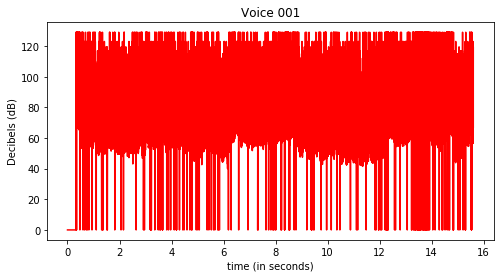

In [0]:
(sample_rate, input_signal) = scipy.io.wavfile.read(pathFile)
setup_graph(title='Voice 001', x_label='time (in seconds)', y_label='Decibels (dB)', fig_size=(8,4))
_ = plt.plot(time_array, db, c = "red")

In [0]:
mean_db = getMean(db)
print(mean_db)
noise_levels(mean_db)

67.74380848042243


'Tráfico Ocupado, aspirador'

In [0]:
!pip install AudioSegment

In [0]:

# Packages reqd: pydub, ffmpeg

# pydub - pip install pydub

# ffmpeg: 
# sudo add-apt-repository ppa:kirillshkrogalev/ffmpeg-next
# sudo apt-get update
# sudo apt-get install ffmpeg

## Load the m4a files (in M4a_files.tar.gz) 

!tar -xvzf M4a_files.tar.gz

## Delete unwanted files (here: Tapping files)

!find M4a_files/ -name 'tapping_results.*' -delete

## Converting to wav
# Using pydub

# Convert all file extensions to m4a (if required)

import os,sys
folder = '/content/drive/My Drive/Noveno Semestre/Intro. Inteligencia Artificial/NoiseProject/'
for filename in os.listdir(folder):
       infilename = os.path.join(folder,filename)
       if not os.path.isfile(infilename): continue
       oldbase = os.path.splitext(filename)
       newname = infilename.replace('.tmp', '.m4a')
       output = os.rename(infilename, newname)


      
# Convert m4a extension files to wav extension files
      
import os
import argparse

from pydub import AudioSegment

formats_to_convert = ['.m4a']

for (dirpath, dirnames, filenames) in os.walk("/content/drive/My Drive/Noveno Semestre/Intro. Inteligencia Artificial/NoiseProject/"):
    for filename in filenames:
        if filename.endswith(tuple(formats_to_convert)):

            filepath = dirpath + '/' + filename
            (path, file_extension) = os.path.splitext(filepath)
            file_extension_final = file_extension.replace('.', '')
            try:
                track = AudioSegment.from_file(filepath,
                        file_extension_final)
                wav_filename = filename.replace(file_extension_final, 'wav')
                wav_path = dirpath + '/' + wav_filename
                print('CONVERTING: ' + str(filepath))
                file_handle = track.export(wav_path, format='wav')
                os.remove(filepath)
            except:
                print("ERROR CONVERTING " + str(filepath))

# Rename folder M4a_files as wav_files
!mv M4a_files wav_files

Dibujar lineas en Folium

https://github.com/jwass/folium/commit/865eda47ddcec937ab22fa39503cebb11a754a69#commitcomment-6469995


Mapa ruido

https://www.kaggle.com/daveianhickey/how-to-folium-for-maps-heatmaps-time-analysis

Dibujar con indicadores: 

https://www.kdnuggets.com/2018/09/visualising-geospatial-data-python-folium.html

In [0]:
!pip install folium

In [0]:
import folium

In [0]:

coordinates = [
    [46.379,-740.819],
    [46.379,-740.819],
    [46.379,-740.819],
    [46.379,-740.819],
    [46.379,-740.819]
]


# Create the map and add the line
m = folium.Map(location=[46.379, 740.819], zoom_start=12)
#m.line(coordinates, line_color='#FF0000', line_weight=5)

m

In [0]:
from folium import plugins
from folium.plugins import HeatMap
import pandas as pd


d = {'Latitude': [4.6379, 4.6378, 4.6377, 4.6376, 4.6375, 4.6356], 'Longitude': [-74.0819, -74.0818, -74.0817, -74.0816, -74.0815, -74.0845], 'Noise': [1,1,1,1,1,45]}
df_acc = pd.DataFrame(data=d)

map_hooray = folium.Map(location=[4.6365, -74.0815],
                    zoom_start = 16)

# Ensure you're handing it floats
df_acc['Latitude'] = df_acc['Latitude'].astype(float)
df_acc['Longitude'] = df_acc['Longitude'].astype(float)
df_acc['Noise'] = df_acc['Noise'].astype(float)

# Filter the DF for rows, then columns, then remove NaNs
#heat_df = df_acc[df_acc['Speed_limit']=='30'] # Reducing data size so it runs faster
#heat_df = heat_df[heat_df['Year']=='2007'] # Reducing data size so it runs faster
heat_df = df_acc[['Latitude', 'Longitude','Noise']]
heat_df = heat_df.dropna(axis=0, subset=['Latitude','Longitude','Noise'])

# List comprehension to make out list of lists
heat_data = [[row['Latitude'],row['Longitude'], row['Noise']] for index, row in heat_df.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(map_hooray)

# Display the map
map_hooray